In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
X_train = np.array([[2, 1, 2, 1], [2,3,2,3]])
y_train = np.array([1.2, 3])

In [5]:
lrg = LinearRegression()

In [6]:
lrg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
lrg.predict([[3, 4, 3, 4]])

array([3.9])

In [12]:
lrg.coef_

array([1.11022302e-16, 4.50000000e-01, 0.00000000e+00, 4.50000000e-01])

In [18]:
X_train = np.array([[1, 1], [1, -1]])
y_train = np.array([3, 2])
lrg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lrg.coef_

array([0. , 0.5])

### 使用岭回归

In [9]:
from sklearn.linear_model import Ridge

In [10]:
ridge = Ridge(alpha=1.0)

In [20]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### 深入岭回归

In [32]:
X_train = 1/(np.arange(10)[:, np.newaxis] + np.arange(1, 11))
y_train = np.ones(10)

In [33]:
# 岭回归的 alpha   测试 200 个 alpha

alpha = np.logspace(-10, -2, 200)

In [34]:
ridge = Ridge(fit_intercept=False)

In [35]:
coefs = []
for a in alpha:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coef = ridge.coef_
    coefs.append(coef)

No handles with labels found to put in legend.


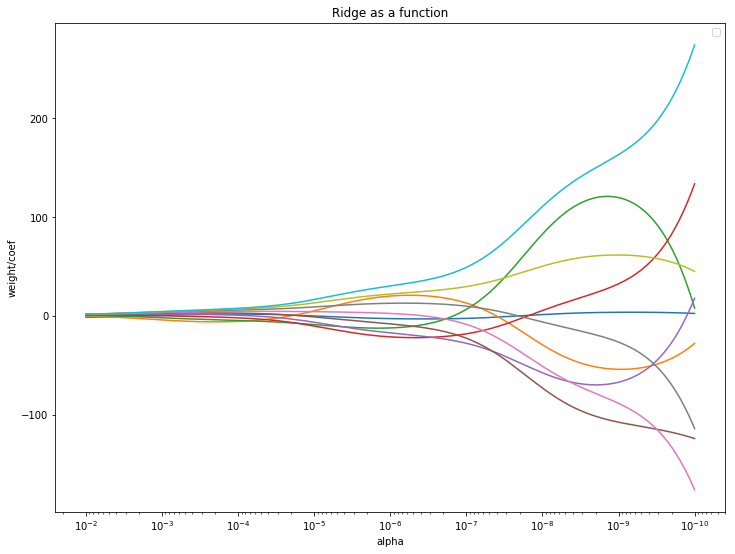

In [45]:
# 绘制图形
plt.figure(figsize=(12, 9))

axes = plt.gca()
axes.plot(alpha, coefs)
axes.set_xscale('log')  # 以log 函数显示
axes.set_xlim(axes.get_xlim()[::-1])
axes.set_xlabel("alpha")
axes.set_ylabel("weight/coef")
plt.title("Ridge as a function")
axes.legend()

## lasso 回归

In [48]:
from sklearn.linear_model import Lasso
import sklearn.datasets as datasets

In [54]:
boston = datasets.load_boston()

x = boston.data
y = boston.target
feature_names = boston.feature_names

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_tesm, y_train, y_test = train_test_split(x, y, random_state=0)

In [57]:
lasso = Lasso(alpha=1.0)

In [58]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
lasso.predict(X_tesm)

array([24.37355028, 23.90153614, 27.24566599, 14.50927684, 20.46850287,
       22.72048528, 20.6388202 , 24.07850995, 21.82617121, 20.08027128,
        8.71239368, 12.64903814, 17.0062159 ,  7.90726011, 35.14650492,
       31.27334477, 21.38198208, 34.9116444 , 30.15894339, 24.80208272,
       25.67187606, 25.5995621 , 19.99271417, 29.63194593, 23.9762867 ,
       17.11948214, 19.57794407, 22.63134548, 31.05657681, 19.64220189,
       16.85151357, 19.02166126, 22.32230823, 24.37212921, 28.34828446,
       19.3316995 ,  9.91576747, 23.94411408, 15.19308501, 11.98894291,
       25.9654283 , 21.12293647, 22.61246887, 15.92854733, 23.80676946,
       25.78018435, 20.25330844, 23.79124395, 13.115027  , 23.42915467,
       21.917734  , 17.32572079, 24.77845146, 27.3806208 , 15.18316708,
       21.91496405, 22.32958508, 17.85635598, 17.8664679 , 19.55382211,
       22.07764326, 22.30037706, 30.98018373, 30.68938244, 17.88947163,
       31.54142018, 17.42814854, 18.85854182, 14.91968503, 23.32

In [62]:
np.random.randn(100, 10)

array([[-7.68788934e-01, -1.46531417e+00,  1.02573295e+00,
         2.09460921e+00, -5.71316687e-01, -1.43849341e+00,
        -1.89463778e-01, -7.75369079e-01, -2.10155013e-01,
        -2.32256719e+00],
       [-8.50736694e-01, -5.62505142e-01, -1.07181975e+00,
        -1.06896319e-01,  1.32294117e-01, -2.88392412e+00,
         1.47574289e+00, -2.53907916e-01,  7.55805161e-01,
        -1.47654058e+00],
       [ 1.53103583e+00, -1.25885582e+00,  1.08921566e+00,
         6.04021326e-02, -1.29024598e+00, -2.89736359e+00,
        -1.25955944e+00,  4.72296690e-01, -1.64336300e-01,
         3.95962130e-01],
       [ 1.27218987e+00,  5.46575217e-02, -2.81252668e-01,
         6.34735547e-01, -8.77895327e-01,  9.62718679e-01,
        -8.55888438e-01, -1.25079931e-01,  1.66856506e+00,
        -6.03289021e-01],
       [-8.45471616e-01, -6.07490205e-01, -5.08270357e-02,
        -2.16245904e+00, -4.44807088e-02, -2.85961544e+00,
         1.30534584e+00,  3.37679623e-01,  1.53115834e+00,
        -6.

## 逻辑斯蒂回归 logistic

In [63]:
digit = datasets.load_digits()

In [65]:
data = digit.data
target = digit.target
target.shape

(1797,)